># <center>LAB 7 - Program for lemmatizing words Using WordNet

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **5 BSC DS** <br>

>_[Github Link](https://github.com/Krishnaa-tech/NLP.git)_

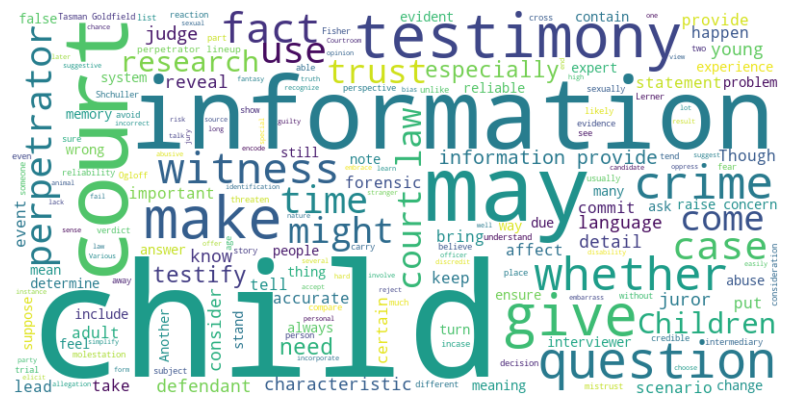

In [1]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Define the set of punctuation characters and English stop words
punctuation = set(string.punctuation)
stop_words_eng = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Map POS tags to WordNet POS tags
tag_dict = {
    'J': wn.ADJ,
    'N': wn.NOUN,
    'V': wn.VERB,
    'R': wn.ADV
}

def extract_wnpostag_from_postag(tag):
    return tag_dict.get(tag[0].upper(), wn.NOUN)

def lemmatize_word(word, pos_tag):
    wn_pos = extract_wnpostag_from_postag(pos_tag)
    return lemmatizer.lemmatize(word, wn_pos)

def bag_of_words(text, stop_words=None):
    if stop_words is None:
        stop_words = stop_words_eng
    
    words = word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    
    cleaned_words = [lemmatize_word(word, pos_tag) for word, pos_tag in tagged_words
                    if word.lower() not in stop_words and word not in punctuation]
    
    return cleaned_words

def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def save_bag_of_words_to_file(bag_of_words, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write('\n'.join(bag_of_words))

def create_word_cloud(bag_of_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(bag_of_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def bag_of_words_to_dataframe(bag_of_words):
    word_freq = Counter(bag_of_words)
    df = pd.DataFrame({'Words': word_freq.keys(), 'Frequency': word_freq.values()})
    return df

def process_text_file(input_file):
    text = read_text_from_file(input_file)
    bag_of_words_list = bag_of_words(text)
    
    # Create a DataFrame from the bag of words with frequencies
    df = bag_of_words_to_dataframe(bag_of_words_list)
    
    # Create and display the word cloud
    create_word_cloud(bag_of_words_list)
    
    return df

# Example usage
input_file = 'national_geographic_article.txt'  # Replace with your input file path
df = process_text_file(input_file)

# Save the DataFrame to a CSV file (optional)
df.to_csv('lemmas_with_frequencies.csv', index=False)

**Code Analysis**
- The code uses WordnetLemmatizer and lemmatizes the words, creates a word cloud, and provides word frequency information in a DataFrame.

- At 1st Step, it removes the punctuations and stop words and then we do pos tagging which makes the words entact with the correct parts of speech whether it's a verb , noun , adverb or adjective.

- The code compares the words before lemmatization and after lemmatization which shows us the usage of Lemmatization.

- It removes bag of words with help of `bag_of_words()` function and save the bag_of_words to a dataframe with the counter and represent it's frequency corresponding to the words.

- Also , plottting of a Word Cloud shows us the remarkable signifincance in the data representation. 


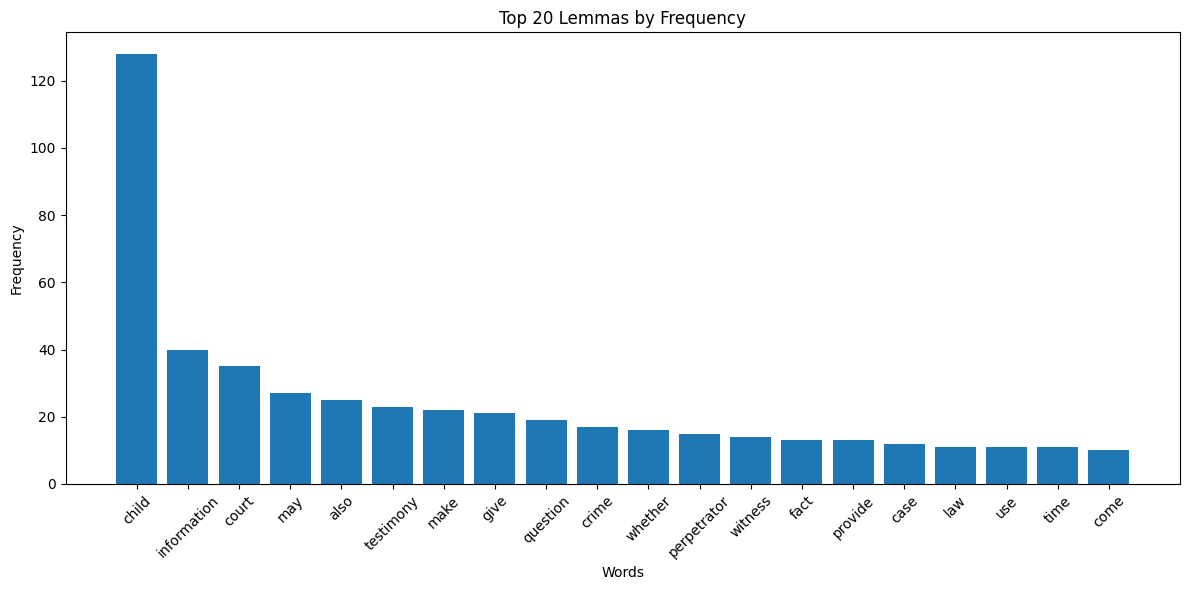

In [2]:
def plot_word_frequencies(df):
    df = df.sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(12, 6))
    plt.bar(df['Words'][:20], df['Frequency'][:20])
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Lemmas by Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_word_frequencies(df)

**Code Analysis**
-  This showcases the bar chart for top 20 lemma words with their frequencies which shows the word child is used mostly in the corpus of  `Can Children be Reliable Courtroom Witnesses?`

In [3]:
df

,Words,Frequency
0,Children,8
1,Reliable,1
2,Courtroom,1
3,Witnesses,1
4,Research,3
...,...,...
610,psychiatry,1
611,Alexadria,1
612,American,1
613,Psychiatric,1
